# Imports: packages and data

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the train data
df_train = pd.read_csv("data/technical/sales_train.csv")

Place for methods to enhance readability

In [3]:
# method to pretty print the probabilities as fixed percentage
def percent(pass_float):
    return '{:.2%}'.format(pass_float)

# Get a feeling for the train data

In [4]:
df_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [5]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [7]:
missing_data = df_train.isna().sum()
print(f"Overview of missing data:\n\n{missing_data}")

Overview of missing data:

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


# Analyze the Label: `item_cnt_day`

The final label is going to be the items sold in a month. Therefore, the sum
of the daily sales.


## Distribution of the label


<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

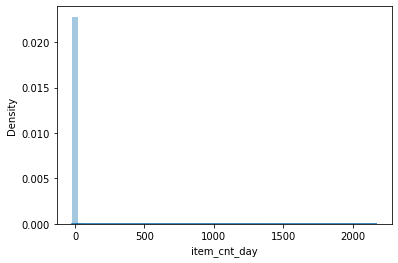

In [8]:
sns.distplot(df_train['item_cnt_day'])

This was not very convincing. Now analyzing how many times an item has been
sold at least twice in one shop on a single day. The idea is to isolate bulk
purchases and detect edge cases.


In [9]:
# get the amount of entry points
total_items_sold_regrouped_per_day = df_train.shape[0]
print(f"{total_items_sold_regrouped_per_day} - Total amount of sales"
      f" regarding exclusive items as well as exclusive days")

# count how many times an item has been sold once and only once within a day
amount_of_single_items_sold_in_a_day = \
    df_train[df_train.item_cnt_day == 1].shape[0]

# create a new frame with said data
df_how_many_items_were_sold_in_bulk = df_train[df_train.item_cnt_day != 1]

# count its occurrences
how_many_items_were_sold_in_bulk = df_how_many_items_were_sold_in_bulk.shape[0]
# calculate the share in comparison to the entire dataset
how_many_items_were_sold_in_bulk_share = \
    how_many_items_were_sold_in_bulk / amount_of_single_items_sold_in_a_day

# print the results
print(f"{how_many_items_were_sold_in_bulk} "
      f"({percent(how_many_items_were_sold_in_bulk_share)})"
      f" - This many times an item has been sold more than once.")

2935849 - Total amount of sales regarding exclusive items as well as exclusive days
306477 (11.66%) - This many times an item has been sold more than once.


Get a fresh overview

In [10]:
df_how_many_items_were_sold_in_bulk.item_cnt_day.describe()

count    306477.000000
mean          3.324341
std           7.801254
min         -22.000000
25%           2.000000
50%           2.000000
75%           3.000000
max        2169.000000
Name: item_cnt_day, dtype: float64

<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

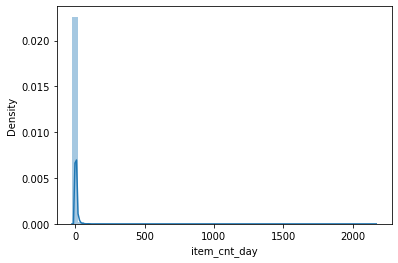

In [11]:
sns.distplot(df_how_many_items_were_sold_in_bulk['item_cnt_day'])

A bit more gets visible now... still not satisfying.

### Overview of the sold item counters with a negative value

Let's look at why and how many items are being counted negatively and as well
as the spikes.

In [12]:
df_negative_counted_item_cnt_day = \
    df_how_many_items_were_sold_in_bulk[ \
        df_how_many_items_were_sold_in_bulk.item_cnt_day < 1]

df_negative_counted_item_cnt_day.describe()


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,7356.00000,7356.000000,7356.000000,7356.000000,7356.000000
mean,14.63037,32.514546,8982.021207,1442.945623,-1.025150
std,9.43772,16.825725,6166.315366,2419.680132,0.368794
min,0.00000,2.000000,28.000000,0.500000,-22.000000
25%,7.00000,19.000000,3734.000000,349.000000,-1.000000
50%,13.00000,31.000000,6927.000000,799.000000,-1.000000
75%,23.00000,47.000000,14056.000000,1699.000000,-1.000000
max,33.00000,59.000000,22167.000000,33490.000000,-1.000000


### Now the spikes

#### Anything above 4 items

In [13]:
df_spikes_counted_item_cnt_day = \
    df_how_many_items_were_sold_in_bulk[ \
        df_how_many_items_were_sold_in_bulk.item_cnt_day > 4]

df_spikes_counted_item_cnt_day.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,37885.000000,37885.000000,37885.000000,37885.000000,37885.000000
mean,15.442418,31.979359,12301.041019,1075.346719,11.011825
std,9.007446,15.545587,7575.366838,2322.265552,20.498457
min,0.000000,0.000000,30.000000,0.100000,5.000000
25%,8.000000,22.000000,4271.000000,5.000000,5.000000
50%,14.000000,30.000000,11534.000000,399.000000,7.000000
75%,22.000000,45.000000,20949.000000,1199.900000,11.000000
max,33.000000,59.000000,22167.000000,31599.000000,2169.000000


<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

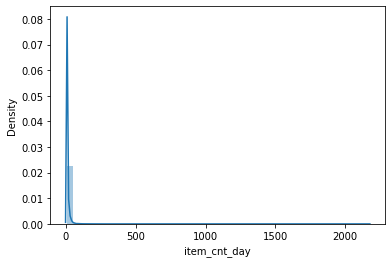

In [14]:
sns.distplot(df_spikes_counted_item_cnt_day['item_cnt_day'])


#### Anything above 25 items

In [15]:
df_spikes_counted_item_cnt_day = \
    df_how_many_items_were_sold_in_bulk[ \
        df_how_many_items_were_sold_in_bulk.item_cnt_day > 25]

df_spikes_counted_item_cnt_day.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,16.371739,31.116087,12666.791739,1260.383529,50.663913
std,8.542480,14.866756,7810.208167,2606.581878,70.370557
min,0.000000,2.000000,485.000000,0.908714,26.000000
25%,9.000000,22.000000,3733.000000,5.000000,30.000000
50%,15.000000,30.000000,11370.000000,434.966165,36.000000
75%,23.000000,42.000000,20949.000000,1799.000000,49.000000
max,33.000000,59.000000,22102.000000,25097.142857,2169.000000


<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

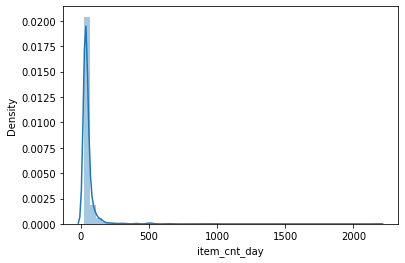

In [16]:
sns.distplot(df_spikes_counted_item_cnt_day['item_cnt_day'])


#### Anything above 100 items

In [17]:
df_spikes_counted_item_cnt_day = \
    df_how_many_items_were_sold_in_bulk[ \
        df_how_many_items_were_sold_in_bulk.item_cnt_day > 100]

df_spikes_counted_item_cnt_day.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,20.659420,28.963768,9866.949275,1531.759833,216.818841
std,8.285504,17.953878,6498.660371,1888.906031,223.068097
min,5.000000,4.000000,1498.000000,0.908714,101.000000
25%,15.000000,12.000000,3732.000000,257.541667,115.250000
50%,22.000000,25.000000,9245.000000,1303.246753,145.000000
75%,27.000000,46.000000,11373.000000,1999.000000,214.500000
max,33.000000,55.000000,20949.000000,18118.712871,2169.000000


<AxesSubplot:xlabel='item_cnt_day', ylabel='Density'>

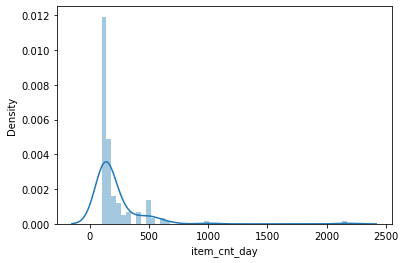

In [18]:
sns.distplot(df_spikes_counted_item_cnt_day['item_cnt_day'])

## Regroup per month


In [19]:
df_regrouped_per_month = df_train.groupby(by='date_block_num')
df_regrouped_per_month.describe()

shop_id                                                     \
                   count       mean        std  min   25%   50%   75%   max   
date_block_num                                                                
0               115690.0  29.536416  16.602384  0.0  18.0  28.0  44.0  59.0   
1               108613.0  28.648339  16.619192  0.0  16.0  28.0  42.0  59.0   
2               121347.0  33.098939  16.044139  2.0  22.0  31.0  47.0  59.0   
3                94109.0  33.630981  15.617114  2.0  23.0  31.0  47.0  59.0   
4                91759.0  33.718752  15.936308  2.0  24.0  31.0  50.0  59.0   
5               100403.0  33.511947  16.366216  2.0  21.0  31.0  50.0  59.0   
6               100548.0  33.577555  16.384590  2.0  22.0  31.0  50.0  59.0   
7               104772.0  33.508829  16.370695  2.0  22.0  31.0  50.0  59.0   
8                96137.0  33.372312  16.251783  2.0  22.0  31.0  50.0  59.0   
9                94202.0  32.919450  16.419665  2.0  21.0  31.0  50.0  59.0   
10               96736.0  33.385689  16.244766  2.0  22.0  31.0  50.0  59.0   
11              143246.0  33.142182  16.238236  2.0  22.0  31.0  47.0  59.0   
12               99349.0  33.390240  16.266975  2.0  22.0  31.0  50.0  59.0   
13               89830.0  33.197818  16.310436  2.0  22.0  31.0  49.0  59.0   
14               92733.0  33.618173  16.164966  2.0  24.0  31.0  49.0  59.0   
15               77906.0  33.477961  16.082718  2.0  22.0  31.0  48.0  59.0   
16               78529.0  33.743216  16.019386  2.0  24.0  31.0  48.0  59.0   
17               82408.0  33.667423  16.266466  2.0  24.0  31.0  49.0  59.0   
18               78760.0  33.917230  16.282078  2.0  24.0  31.0  49.0  59.0   
19               86614.0  34.042106  16.262036  2.0  24.0  31.0  49.0  59.0   
20               73157.0  33.656943  16.167844  2.0  24.0  31.0  48.0  59.0   
21               79361.0  33.036050  16.169175  2.0  22.0  31.0  47.0  59.0   
22               86428.0  33.546999  15.998228  2.0  24.0  31.0  48.0  59.0   
23              130786.0  33.180142  15.954395  2.0  22.0  31.0  47.0  59.0   
24               88522.0  33.797214  15.969662  2.0  25.0  31.0  48.0  59.0   
25               71808.0  33.494068  16.162536  2.0  24.0  31.0  48.0  59.0   
26               69977.0  33.800506  16.036163  2.0  24.0  31.0  48.0  59.0   
27               56274.0  32.480702  15.755179  2.0  22.0  31.0  46.0  59.0   
28               54548.0  32.353890  15.598215  2.0  22.0  31.0  46.0  59.0   
29               54617.0  32.292034  16.009824  2.0  22.0  31.0  46.0  59.0   
30               55549.0  32.826207  16.047657  2.0  22.0  31.0  47.0  59.0   
31               57029.0  33.025829  16.502157  2.0  21.0  31.0  47.0  59.0   
32               50588.0  32.384834  16.265323  2.0  21.0  31.0  47.0  59.0   
33               53514.0  31.580969  16.122448  2.0  20.0  31.0  46.0  59.0   

                 item_id                ... item_price           item_cnt_day  \
                   count          mean  ...        75%       max        count   
date_block_num                          ...                                     
0               115690.0  10234.002827  ...     719.44   32990.0     115690.0   
1               108613.0   9907.138004  ...     799.00   25500.0     108613.0   
2               121347.0  10061.325142  ...     699.00   32990.0     121347.0   
3                94109.0  10321.499166  ...     699.00   29700.0      94109.0   
4                91759.0  10357.272725  ...     699.00   24900.0      91759.0   
5               100403.0  10431.473542  ...     657.00   27100.0     100403.0   
6               100548.0  10612.447587  ...     649.00   32990.0     100548.0   
7               104772.0  10174.196904  ...     699.00   21990.0     104772.0   
8                96137.0   9963.610691  ...     799.00   59200.0      96137.0   
9                94202.0  10255.260090  ...     899.00   42000.0      94202.0   
10               96736.0  10077.527549  

Show the amount of sold items, regrouped by month

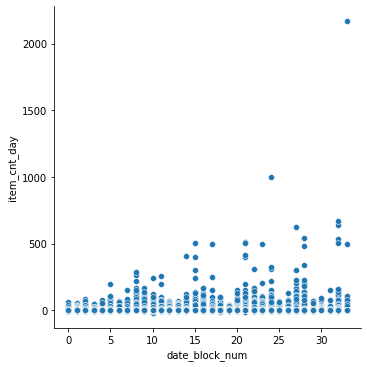

In [20]:
var = "item_cnt_day"
data = pd.concat([df_train["date_block_num"], df_train[var]], axis=1)
plot = sns.relplot(data=data, x="date_block_num", y=var)

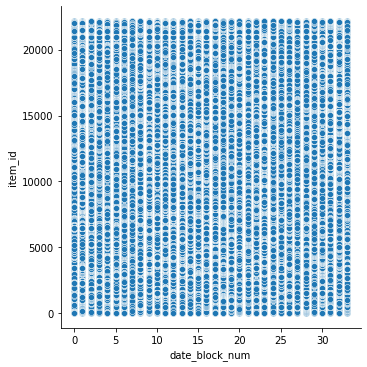

In [21]:
var = "item_id"
data = pd.concat([df_train["date_block_num"], df_train[var]], axis=1)
plot = sns.relplot(data=data, x="date_block_num", y=var)

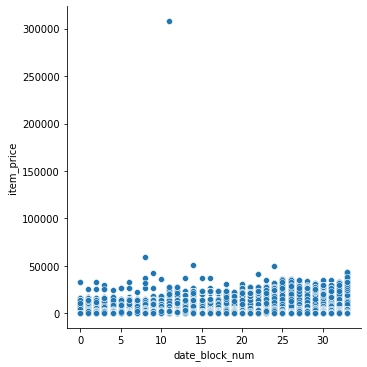

In [22]:
var = "item_price"
data = pd.concat([df_train["date_block_num"], df_train[var]], axis=1)
plot = sns.relplot(data=data, x="date_block_num", y=var)

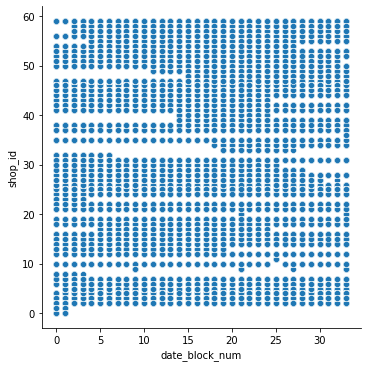

In [23]:
var = "shop_id"
data = pd.concat([df_train["date_block_num"], df_train[var]], axis=1)
plot = sns.relplot(data=data, x="date_block_num", y=var)